In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train_df.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.22,37.78,44.0,1678.0,514.0,1700.0,495.0,2.0801,131900.0,NEAR BAY
1,-119.68,36.77,21.0,1260.0,182.0,583.0,205.0,6.0132,150800.0,INLAND
2,-117.96,33.80,30.0,729.0,131.0,488.0,139.0,4.7667,195200.0,<1H OCEAN
3,-117.28,32.83,34.0,2392.0,653.0,933.0,619.0,3.7306,500000.0,NEAR OCEAN
4,-122.53,38.32,22.0,3577.0,NaN,1371.0,501.0,5.7950,332300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
16507,-118.75,34.26,26.0,1767.0,265.0,1040.0,250.0,5.4787,198100.0,<1H OCEAN
16508,-116.76,34.23,10.0,4374.0,989.0,1020.0,376.0,2.6071,89000.0,INLAND
16509,-118.47,34.03,29.0,3287.0,882.0,1523.0,823.0,3.7381,290600.0,<1H OCEAN
16510,-122.41,37.66,32.0,1385.0,356.0,1096.0,353.0,4.4750,246700.0,NEAR OCEAN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16345 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16345.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.571391,35.634637,28.568132,2644.300993,539.983053,1427.440286,501.296027,3.871681,206866.113614
std,2.003399,2.134671,12.584525,2163.532475,419.660980,1094.956955,381.888107,1.897975,115309.035206
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,788.000000,280.000000,2.567850,120000.000000
50%,-118.500000,34.260000,29.000000,2134.500000,436.000000,1170.500000,410.000000,3.541700,179550.000000
75%,-118.000000,37.710000,37.000000,3168.000000,652.000000,1732.000000,608.000000,4.744075,264700.000000
max,-114.470000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,500001.000000


# Missing values


In [5]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [6]:
df['total_bedrooms'].describe()

count    16345.000000
mean       539.983053
std        419.660980
min          2.000000
25%        296.000000
50%        436.000000
75%        652.000000
max       6210.000000
Name: total_bedrooms, dtype: float64

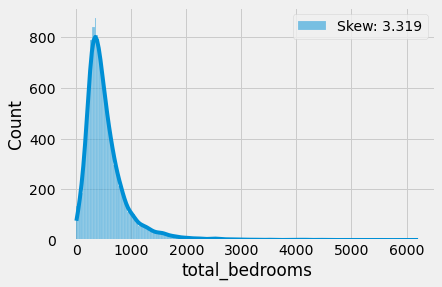

In [7]:
skew = round(df['total_bedrooms'].skew(), 3)
sns.histplot(df['total_bedrooms'], kde=True, label=f'Skew: {skew}')
plt.legend(loc='best')


In [8]:
op_for_nans = df[['total_bedrooms', 'ocean_proximity']].loc[
    df['total_bedrooms'].isna()]['ocean_proximity'].value_counts()
op_for_nans = op_for_nans.index.to_list()
op_for_nans

['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY']

In [9]:
for val in op_for_nans:
    median = df[df['ocean_proximity'] == val]['total_bedrooms'].median()
    df.loc[df['ocean_proximity']==val,'total_bedrooms'] =  \
        df[df['ocean_proximity']==val]['total_bedrooms'].fillna(median)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


<AxesSubplot:>

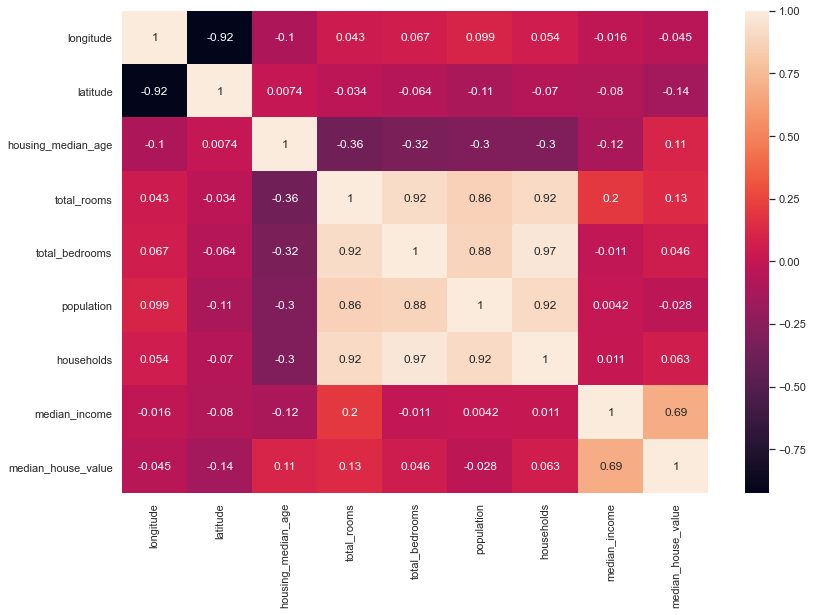

In [11]:
sns.set(font_scale= 1)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df.corr(), annot=True)

#EDA

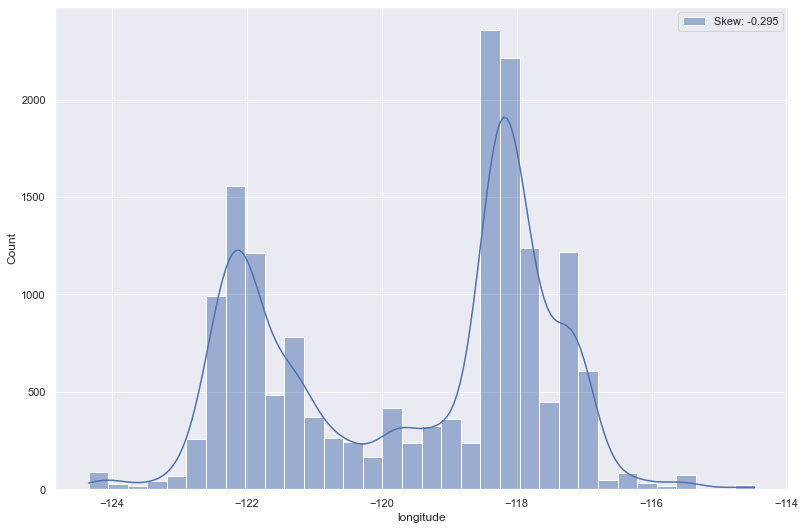

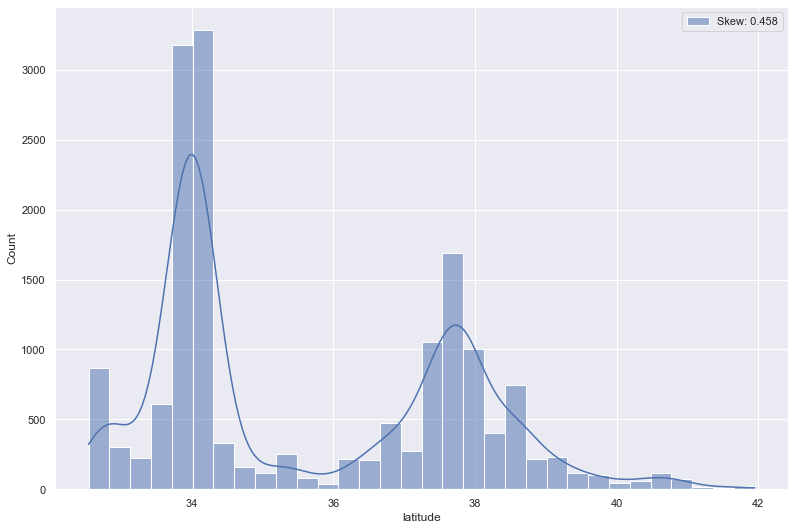

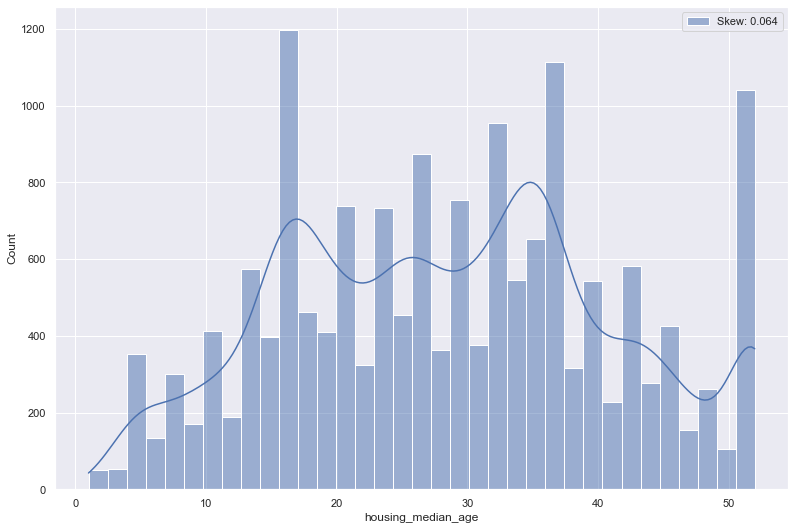

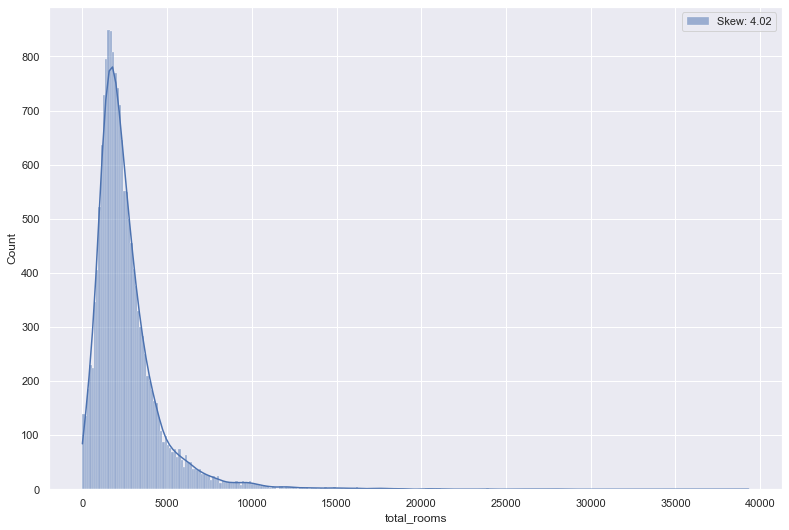

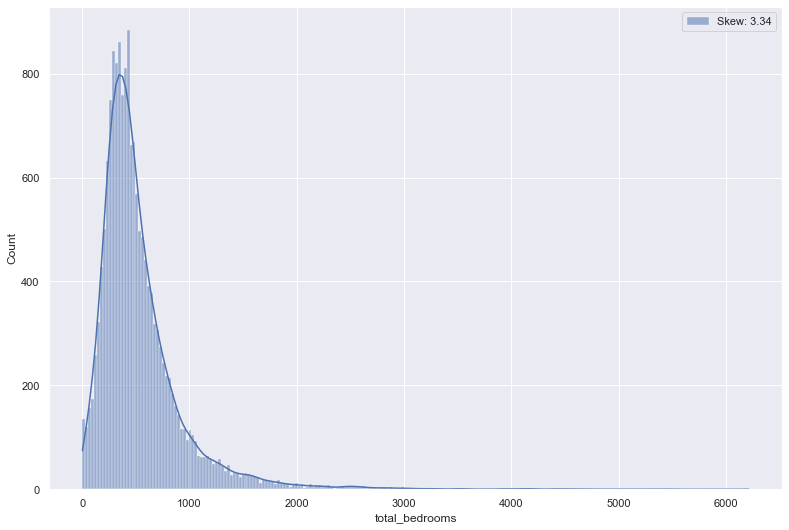

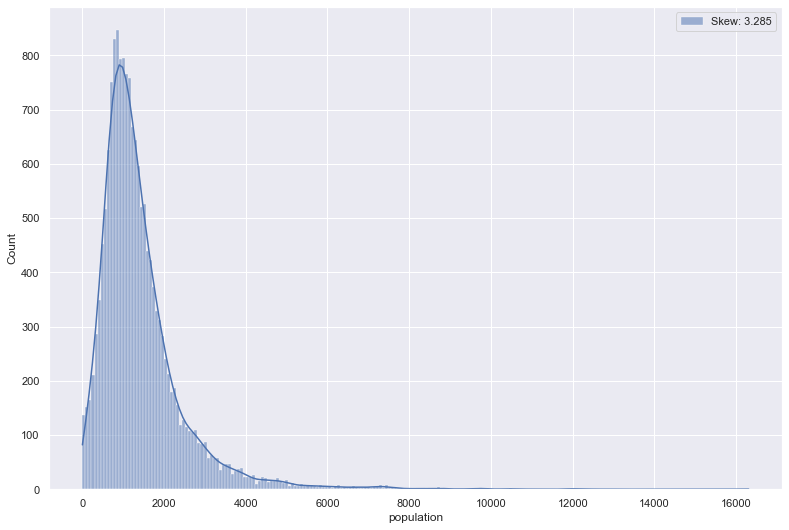

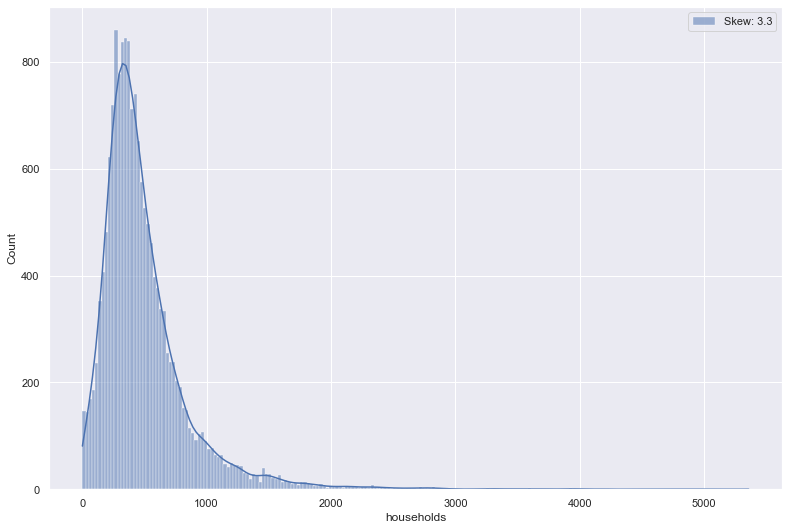

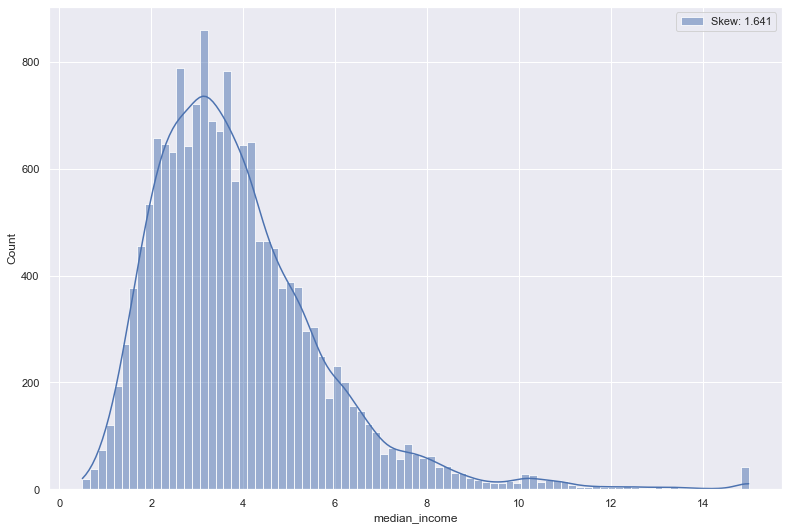

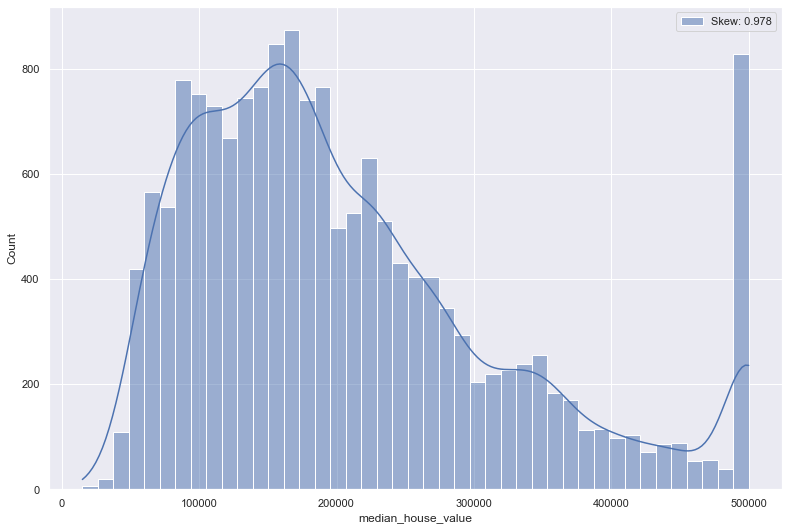

In [12]:
df_num = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']



for col in df_num:
    sns.set(font_scale= 1)
    fig, ax = plt.subplots(figsize=a4_dims)
    skew = round(df[col].skew(), 3)
    sns.histplot(df[col], kde= True , label=f'Skew: {skew}')
    plt.legend(loc='best')
    plt.show()

In [13]:
df['median_house_value'].value_counts()

500001.0    770
137500.0     97
162500.0     93
187500.0     76
225000.0     75
           ... 
370100.0      1
314500.0      1
274400.0      1
337600.0      1
479000.0      1
Name: median_house_value, Length: 3681, dtype: int64

In [14]:
df = df.loc[df['median_house_value'] < 500001, :]



<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

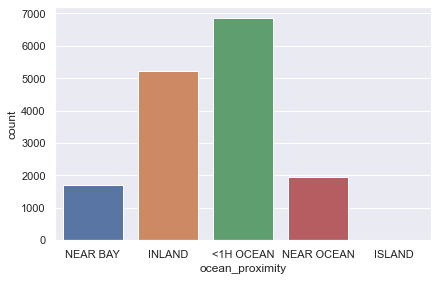

In [15]:
sns.countplot(x=df['ocean_proximity'])

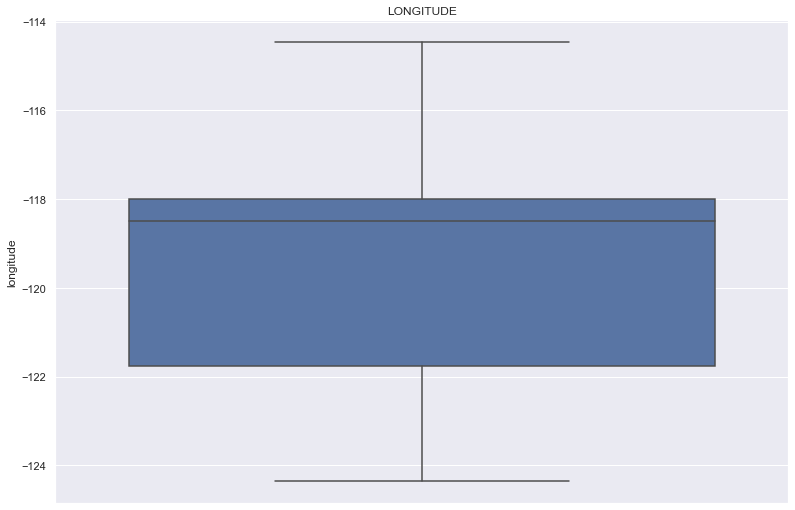

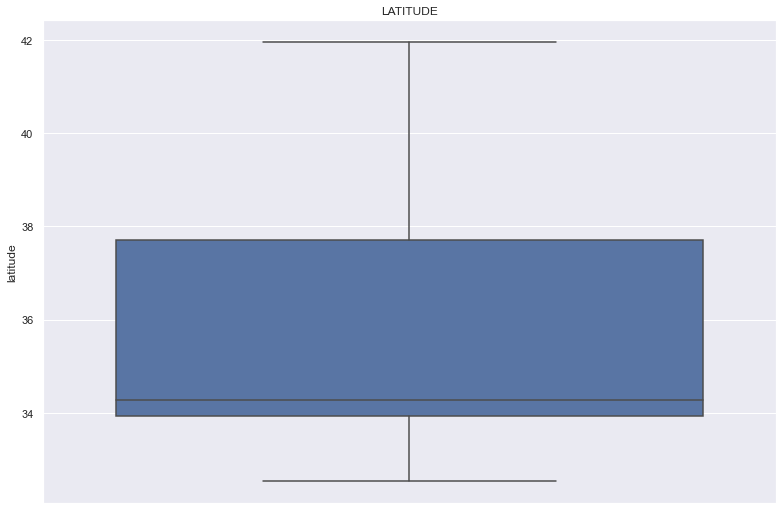

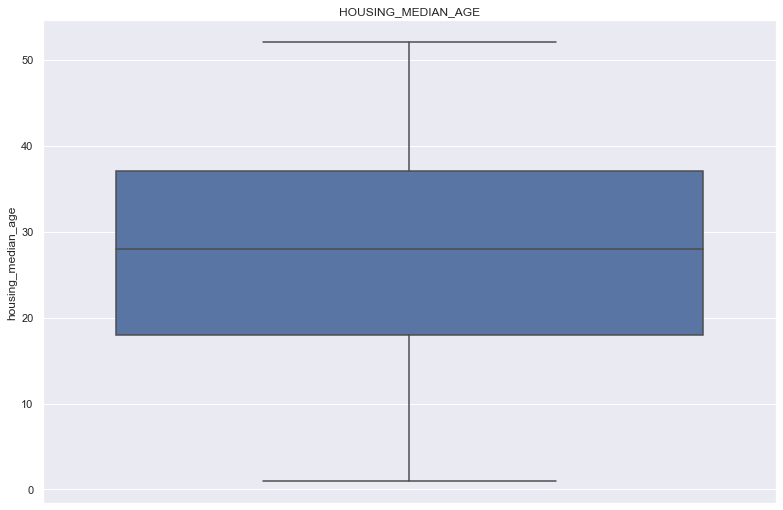

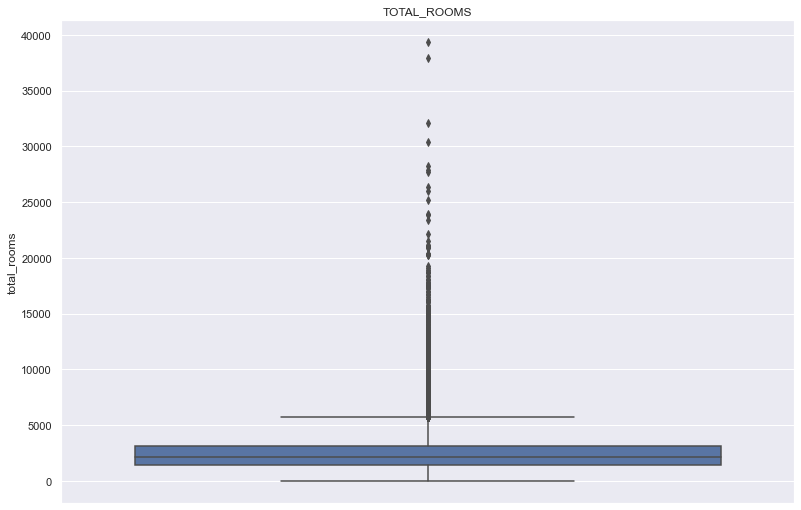

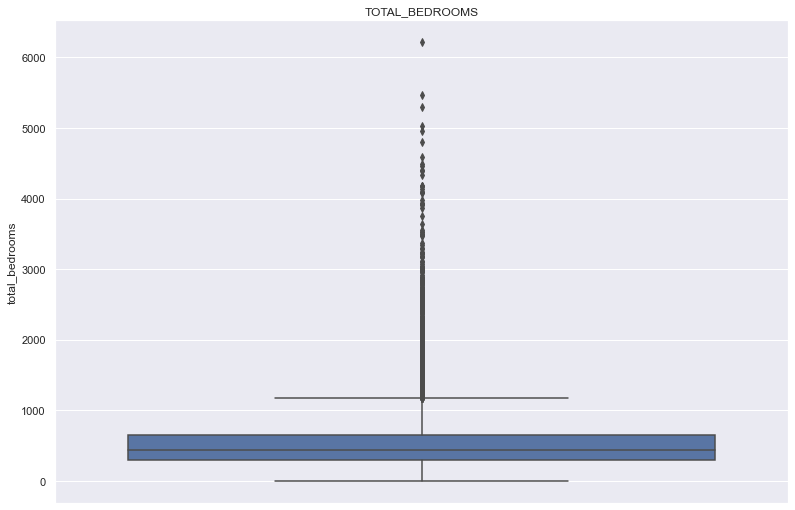

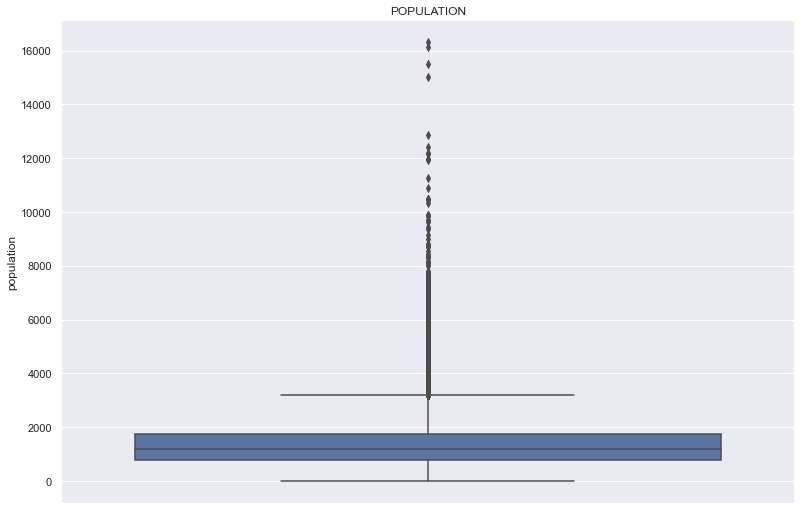

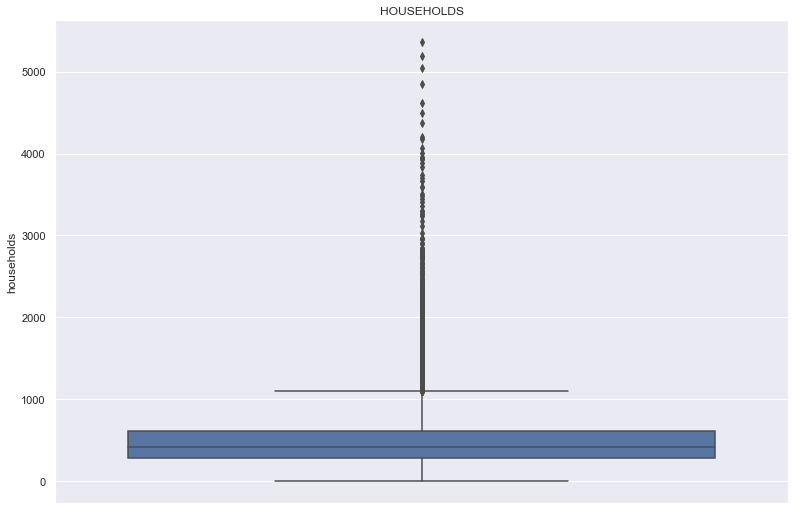

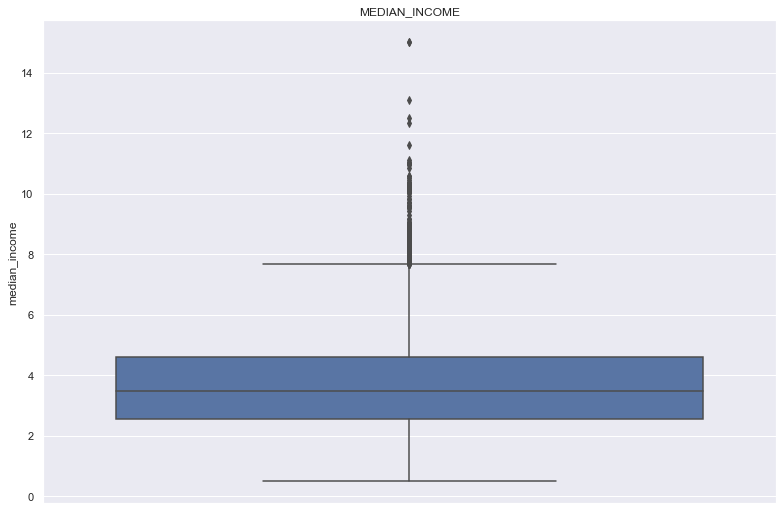

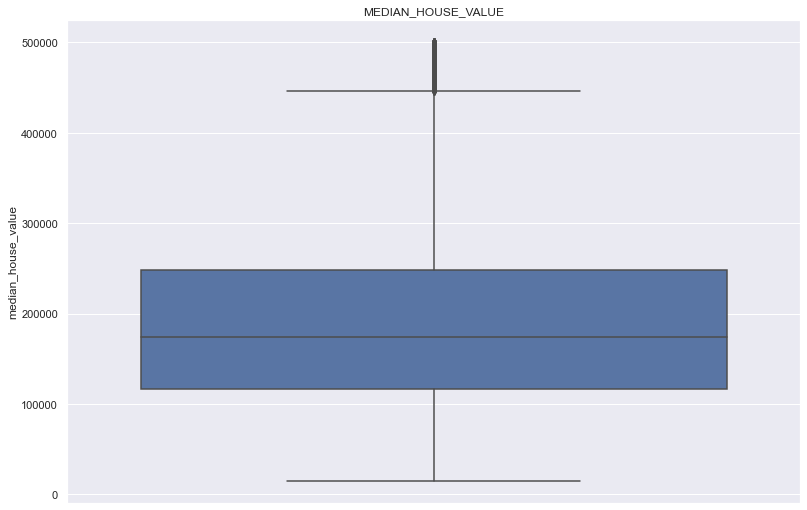

In [16]:
for col in df_num:
    sns.set(font_scale= 1)
    fig, ax = plt.subplots(figsize=a4_dims)
    skew = round(df[col].skew(), 3)
    sns.boxplot(y=df[col])
    plt.title(col.upper())
    plt.show()



In [17]:
outlier_cols = ['total_rooms','total_bedrooms', 'population',
                'households', 'median_income']


def outlier_treatment(datacolumn):
    sorted(datacolumn)
    q1, q3 = np.percentile(datacolumn , [25,75])
    iqr = q3 - q1
    lower_range = q1 - (1.5 * iqr)
    upper_range = q3 + (1.5 * iqr)
    return lower_range,upper_range


In [18]:
# Test
for col in outlier_cols:
    lower_range, upper_range = outlier_treatment(df['total_rooms'])
    outliers = df.loc[(df['total_rooms'] > upper_range) | (df['total_rooms'] < lower_range)]
    outliers_indexes = outliers.index
    df = df.drop(outliers_indexes)

In [19]:
df.shape

(14338, 10)

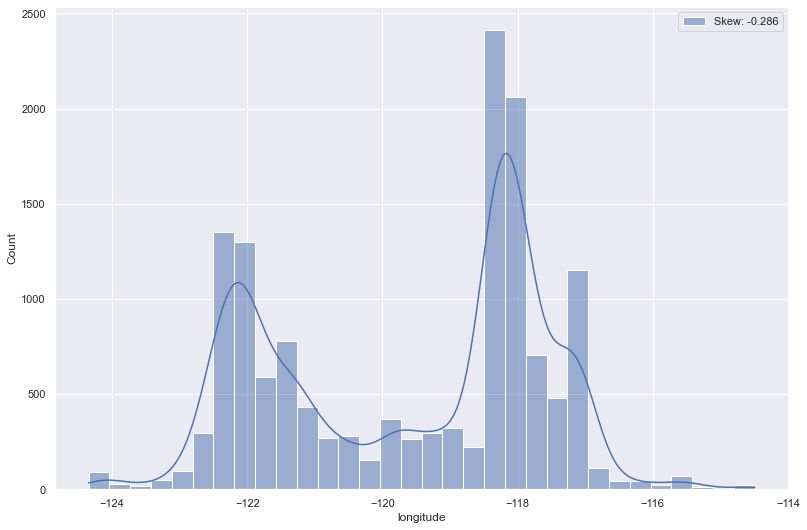

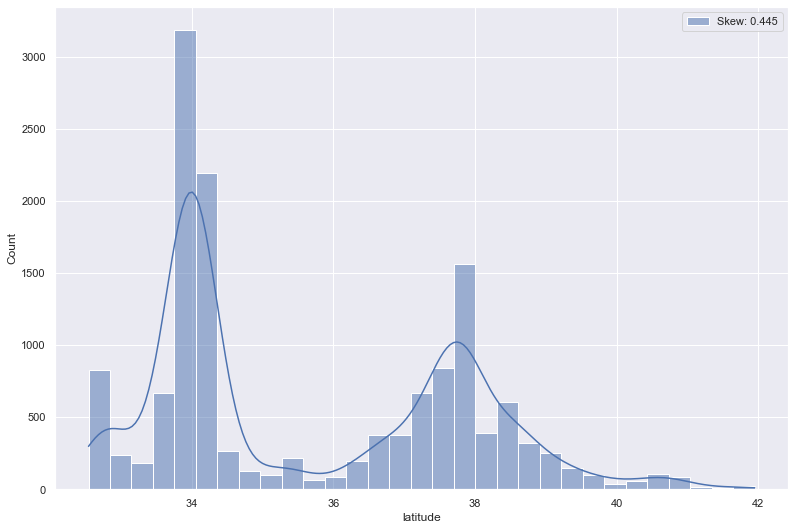

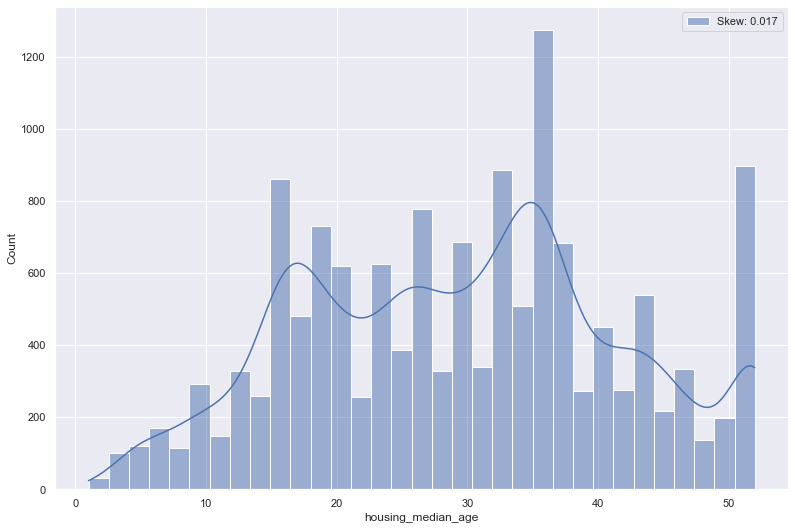

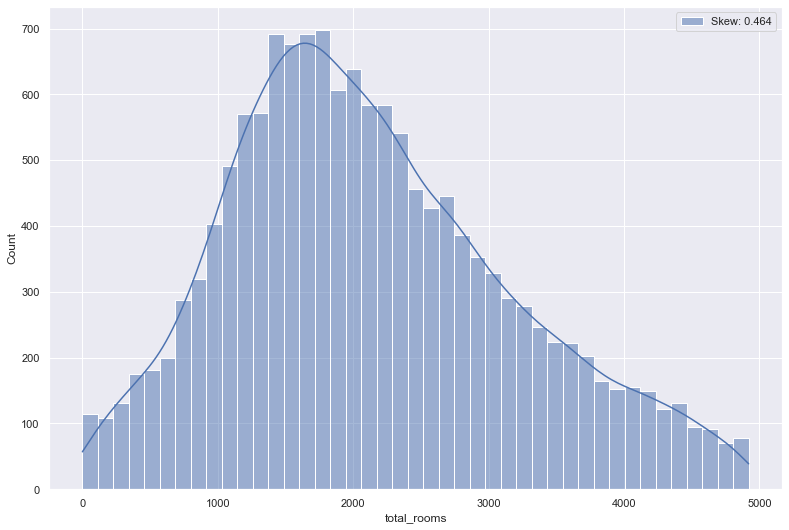

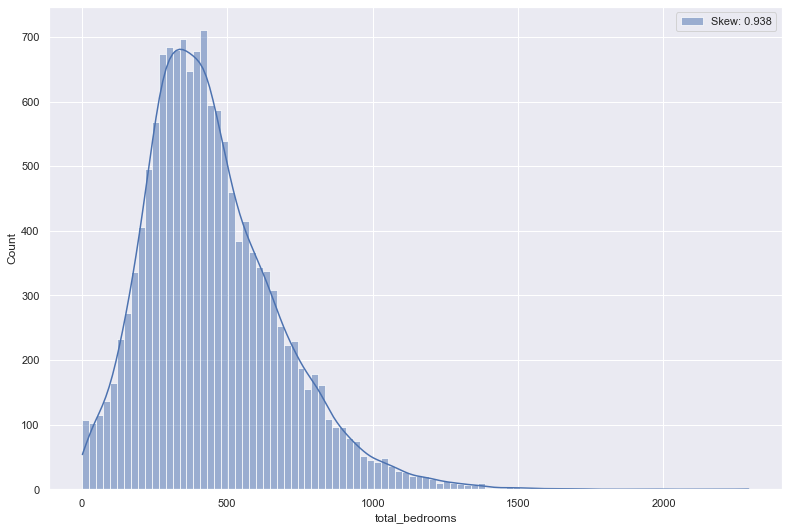

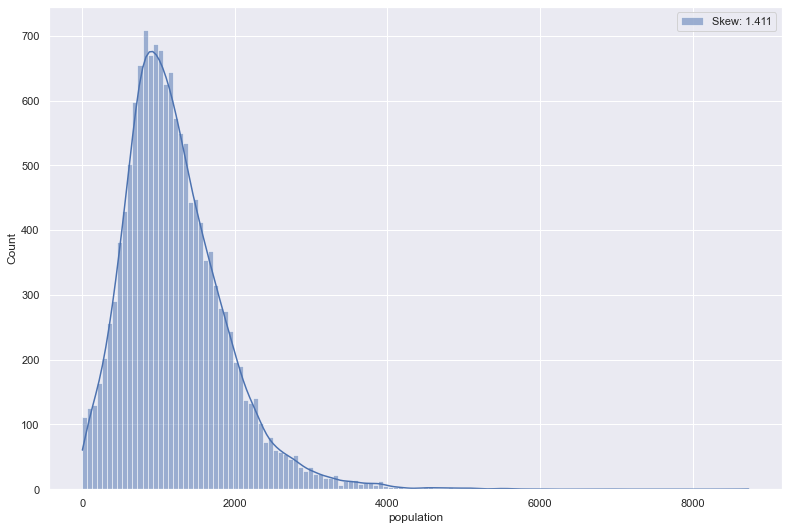

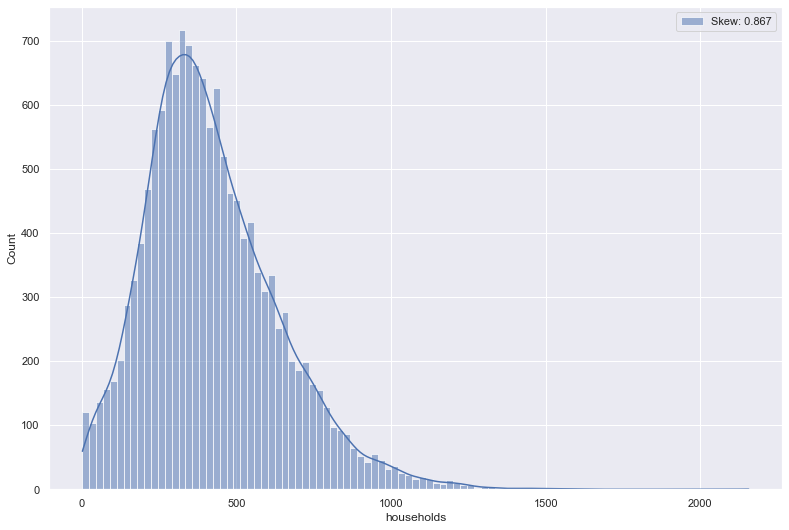

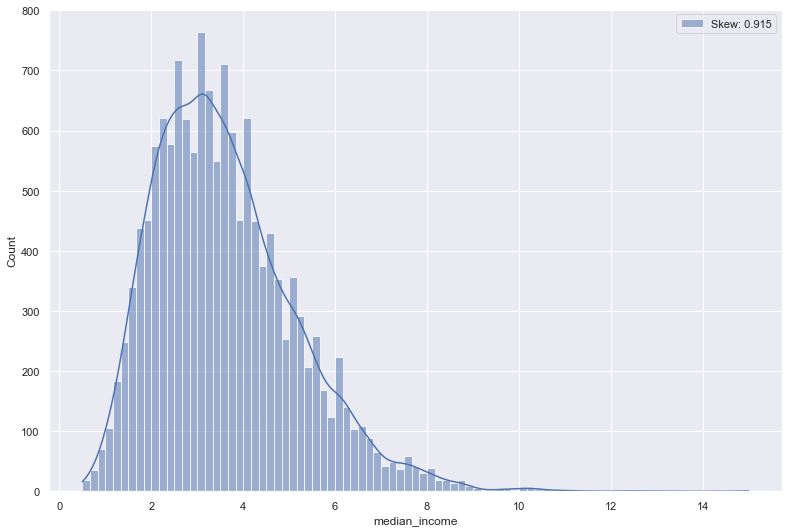

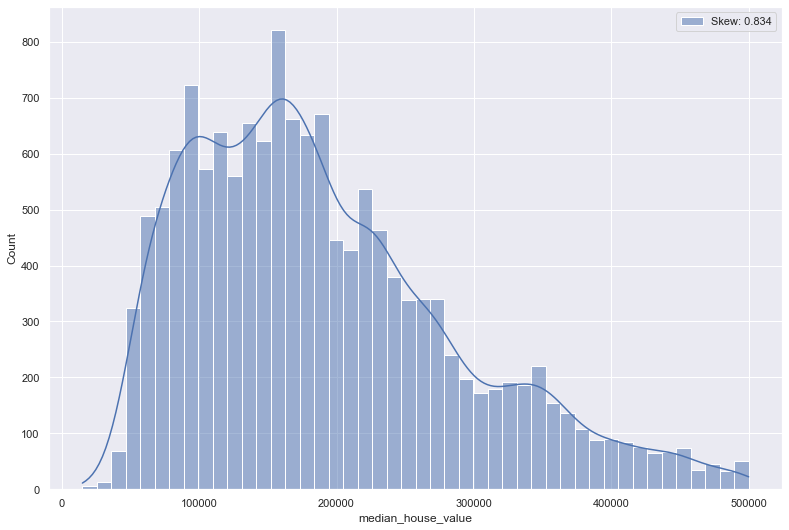

In [20]:
for col in df_num:
    sns.set(font_scale= 1)
    fig, ax = plt.subplots(figsize=a4_dims)
    skew = round(df[col].skew(), 3)
    sns.histplot(df[col], kde= True , label=f'Skew: {skew}')
    plt.legend(loc='best')
    plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14338 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14338 non-null  float64
 1   latitude            14338 non-null  float64
 2   housing_median_age  14338 non-null  float64
 3   total_rooms         14338 non-null  float64
 4   total_bedrooms      14338 non-null  float64
 5   population          14338 non-null  float64
 6   households          14338 non-null  float64
 7   median_income       14338 non-null  float64
 8   median_house_value  14338 non-null  float64
 9   ocean_proximity     14338 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


<AxesSubplot:>

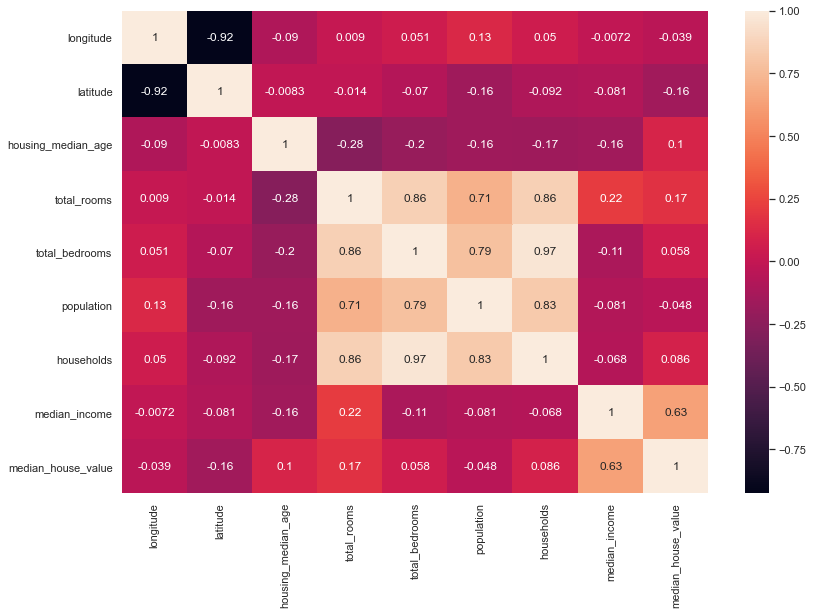

In [22]:
sns.set(font_scale= 1)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df.corr(), annot=True)


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [24]:
# Checking the multicollinearity using vif
X = df.drop(['ocean_proximity', 'median_house_value'], 1)
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [25]:
vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
0,const,16840.663304
7,households,21.382757
5,total_bedrooms,18.818373
2,latitude,9.205613
1,longitude,8.805190
4,total_rooms,7.343645
6,population,3.436261
8,median_income,1.953122
3,housing_median_age,1.210850


# Feature engineering/Selection

### Log Transforming

In [26]:
outlier_cols.remove('total_rooms')
for col in outlier_cols:
    df[col] = np.log(df[col])

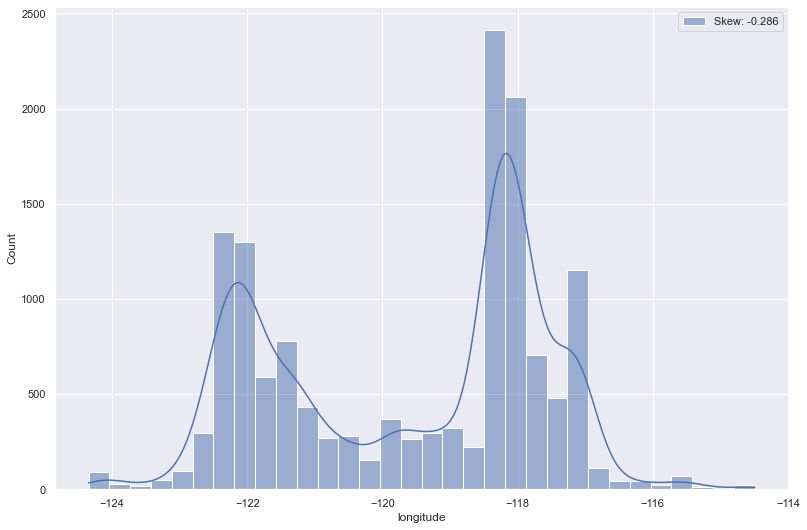

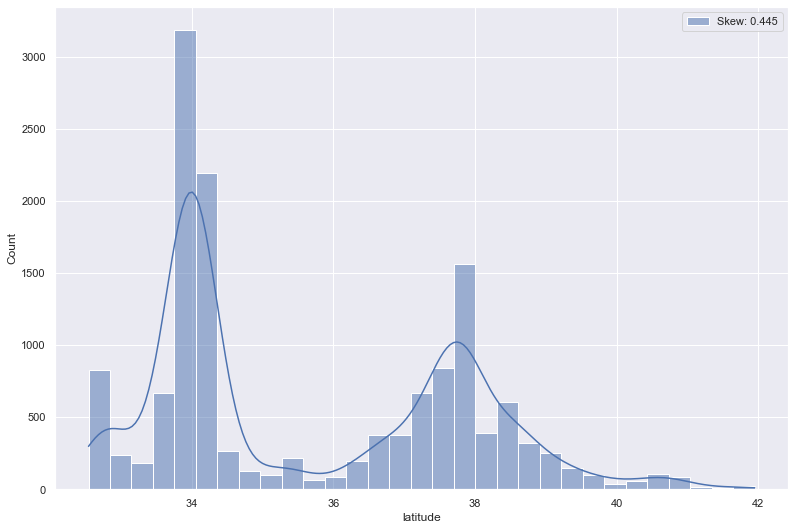

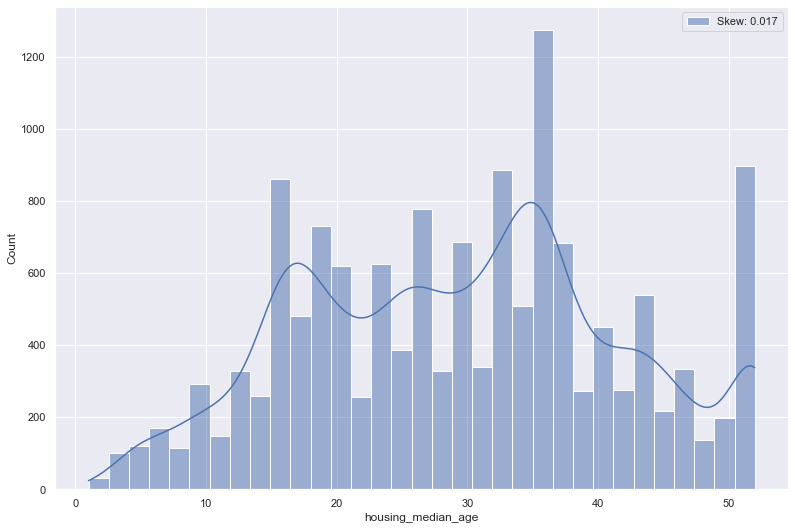

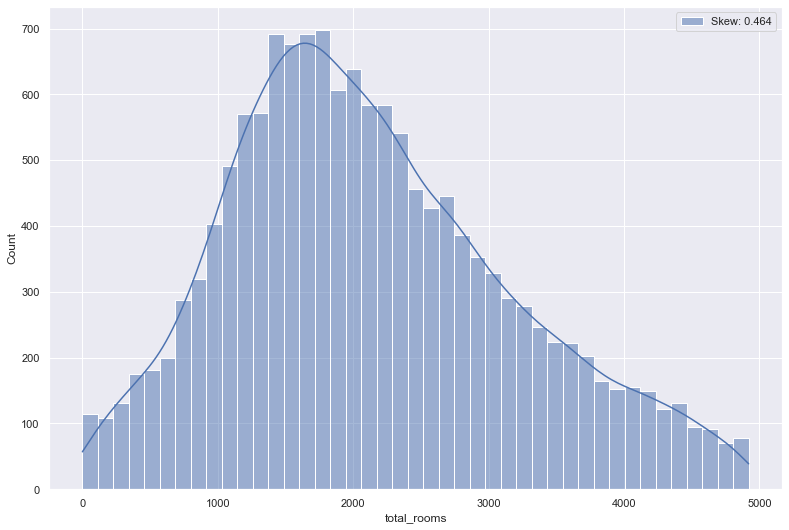

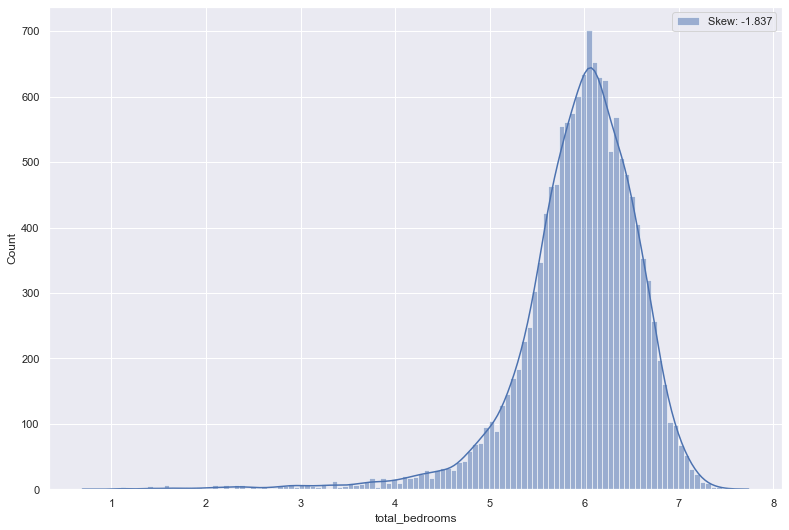

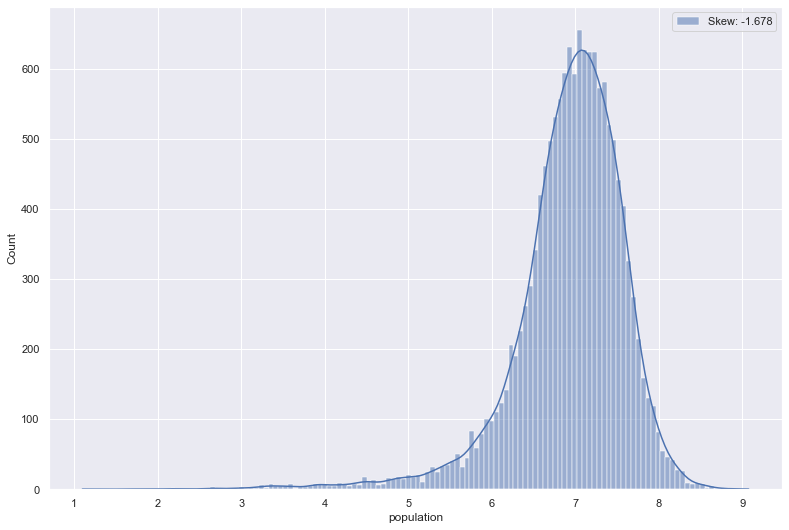

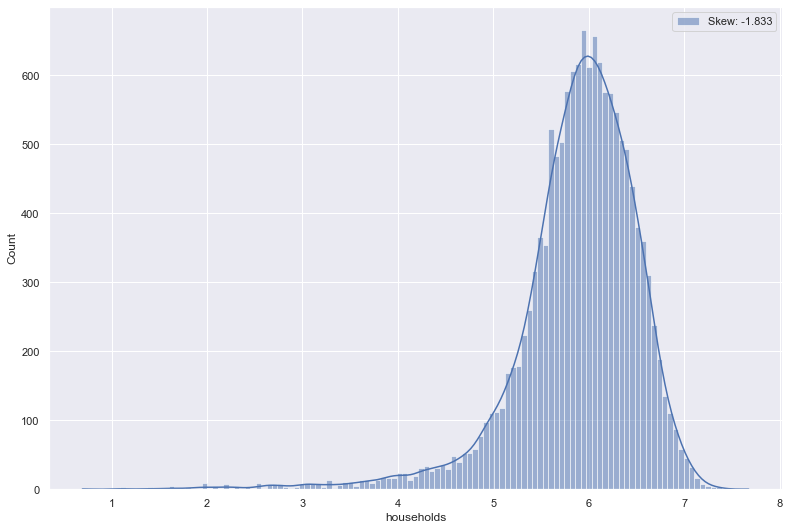

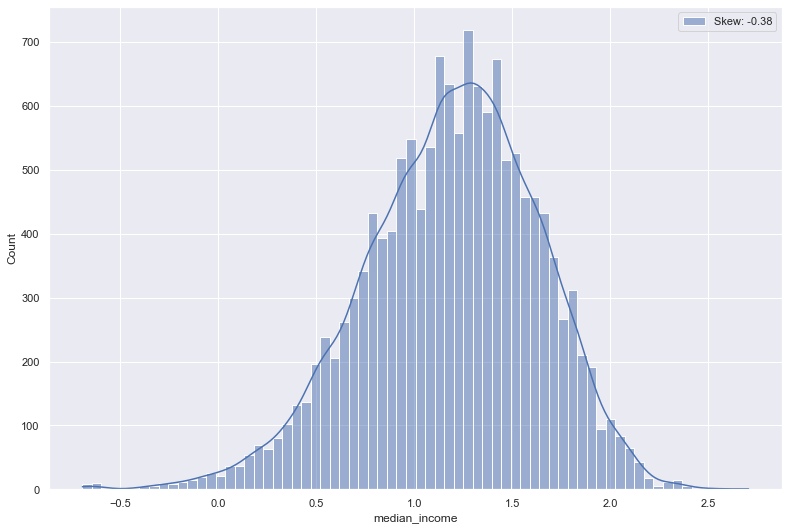

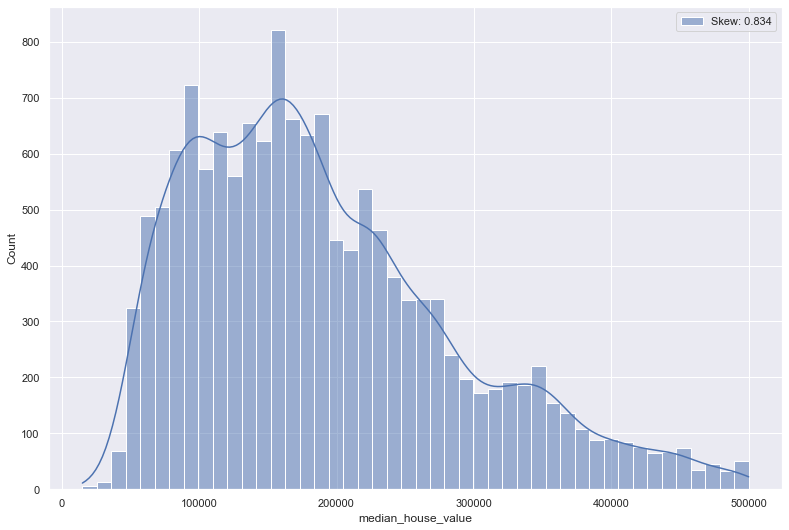

In [27]:

for col in df_num:
    sns.set(font_scale= 1)
    fig, ax = plt.subplots(figsize=a4_dims)
    skew = round(df[col].skew(), 3)
    sns.histplot(df[col], kde= True , label=f'Skew: {skew}')
    plt.legend(loc='best')
    plt.show()


### Adding Features

In [28]:
df["rooms_per_household"]=df["total_rooms"]/df["households"]
df["bedrooms_per_room"]=df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

In [29]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.22,37.78,44.0,1678.0,6.242223,7.438384,6.204558,0.732416,131900.0,NEAR BAY,270.446350,0.003720,1.198858
1,-119.68,36.77,21.0,1260.0,5.204007,6.368187,5.323010,1.793957,150800.0,INLAND,236.708179,0.004130,1.196351
2,-117.96,33.80,30.0,729.0,4.875197,6.190315,4.934474,1.561654,195200.0,<1H OCEAN,147.736113,0.006688,1.254504
3,-117.28,32.83,34.0,2392.0,6.481577,6.838405,6.428105,1.316569,500000.0,NEAR OCEAN,372.115872,0.002710,1.063829
4,-122.53,38.32,22.0,3577.0,6.082219,7.223296,6.216606,1.756995,332300.0,<1H OCEAN,575.394346,0.001700,1.161936
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.75,34.26,26.0,1767.0,5.579730,6.946976,5.521461,1.700868,198100.0,<1H OCEAN,320.023998,0.003158,1.258177
16508,-116.76,34.23,10.0,4374.0,6.896694,6.927558,5.929589,0.958238,89000.0,INLAND,737.656504,0.001577,1.168303
16509,-118.47,34.03,29.0,3287.0,6.782192,7.328437,6.712956,1.318577,290600.0,<1H OCEAN,489.650148,0.002063,1.091686
16510,-122.41,37.66,32.0,1385.0,5.874931,6.999422,5.866468,1.498506,246700.0,NEAR OCEAN,236.087538,0.004242,1.193124


### Adding big_city_dist and name as Features

In [30]:
cities_coords = pd.read_csv('cal_cities_lat_long.csv')
cities_coords

,Name,Latitude,Longitude
0,Adelanto,34.582769,-117.409214
1,Agoura Hills,34.153339,-118.761675
2,Alameda,37.765206,-122.241636
3,Albany,37.886869,-122.297747
4,Alhambra,34.095286,-118.127014
...,...,...,...
454,Woodland,38.678517,-121.773297
455,Yorba Linda,33.888625,-117.813111
456,Yreka,41.735419,-122.634472
457,Yuba City,39.140447,-121.616911


In [31]:
cities_pop = pd.read_excel('1990 to 2000 Population Changes in California Cities and Counties (XLS).xlsx')
cities_pop.drop(range(0, 12), axis=0, inplace=True)
cities_pop.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], 1, inplace=True)

In [32]:
cities_pop.columns = ['City', 'Population']

In [33]:
cities_pop.isna().sum()

City          57
Population    75
dtype: int64

In [34]:
cities_pop.dropna(inplace=True)



In [35]:
counties_indexes = cities_pop[cities_pop['City'].str.contains("County")].index
cities_pop.drop(counties_indexes, inplace=True)

In [36]:
cities_pop.sort_values('City', inplace=True)
cities_coords.columns =['City', 'Latitude', 'Longitude']
cities_coords.sort_values('City', inplace=True)

In [37]:
cities_pop[~cities_pop['City'].str.contains("city")]


,City,Population
387,Apple Valley town,46079
453,Atherton town,7163
457,Colma town,1103
243,Corte Madera town,8272
56,Danville town,31306
244,Fairfax town,6931
462,Hillsborough town,10667
341,Loomis town,5705
488,Los Altos Hills town,7514
489,Los Gatos town,27357


In [38]:
cities_coords[cities_coords['City'].str.contains("city")]

,City,Latitude,Longitude


In [39]:
"""
remove from:
DONE cities_pop every lowercase city, town word in each row (use replace)
 cities_coords every city not in cities_pop remove
"""

'\nremove from:\nDONE cities_pop every lowercase city, town word in each row (use replace)\n cities_coords every city not in cities_pop remove\n'

In [40]:
cities_pop['City'] = cities_pop['City'].transform(lambda x: x.str.replace(' city', ''))
cities_pop['City'] = cities_pop['City'].transform(lambda x: x.str.replace(' town', ''))

In [41]:
print(cities_pop[cities_pop['City'].str.contains("town")].sum())
print(cities_pop[cities_pop['City'].str.contains("city")].sum())

City          0.0
Population    0.0
dtype: float64
City          0.0
Population    0.0
dtype: float64


In [42]:
cities_pop = cities_pop.loc[cities_pop['Population'] > 400000]

cities_coords = cities_coords.loc[cities_coords['City'].isin(cities_pop['City'])]

In [43]:
cities_pop

,City,Population
195,Long Beach,429433
196,Los Angeles,3485398
425,San Diego,1110549
432,San Francisco,723959
495,San Jose,782248


In [44]:
cities_coords

,City,Latitude,Longitude
226,Long Beach,33.768322,-118.195617
229,Los Angeles,34.052233,-118.243686
349,San Diego,32.715328,-117.157256
352,San Francisco,37.774931,-122.419417
356,San Jose,37.339386,-121.894956


In [45]:
from geopy import distance

In [46]:
df['nearest_big_city'] = np.nan
df['nearest_big_city_dist'] = np.nan


for house_index, house_row in df.iterrows():
    house_lat_long = (house_row['latitude'], house_row['longitude'])

    closest_city = None
    for city_index, city_row in cities_coords.iterrows():
        city_lat_long = (round(city_row['Latitude'], 6), round(city_row['Longitude'], 6))
        dist = distance.distance(house_lat_long, city_lat_long).kilometers

        if closest_city is None:
            closest_city = (city_row['City'], dist)
        elif dist < closest_city[1]:
            closest_city = (city_row['City'], dist)

    df.loc[house_index, 'nearest_big_city'] = closest_city[0]
    df.loc[house_index, 'nearest_big_city_dist'] = closest_city[1]



# df.to_csv('df_mod', index=False)

In [47]:
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,nearest_big_city,nearest_big_city_dist
0,-122.22,37.78,44.0,1678.0,6.242223,7.438384,6.204558,0.732416,131900.0,NEAR BAY,270.446350,0.003720,1.198858,San Francisco,17.577085
1,-119.68,36.77,21.0,1260.0,5.204007,6.368187,5.323010,1.793957,150800.0,INLAND,236.708179,0.004130,1.196351,San Jose,206.894843
2,-117.96,33.80,30.0,729.0,4.875197,6.190315,4.934474,1.561654,195200.0,<1H OCEAN,147.736113,0.006688,1.254504,Long Beach,22.103384
3,-117.28,32.83,34.0,2392.0,6.481577,6.838405,6.428105,1.316569,500000.0,NEAR OCEAN,372.115872,0.002710,1.063829,San Diego,17.145839
4,-122.53,38.32,22.0,3577.0,6.082219,7.223296,6.216606,1.756995,332300.0,<1H OCEAN,575.394346,0.001700,1.161936,San Francisco,61.274898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.75,34.26,26.0,1767.0,5.579730,6.946976,5.521461,1.700868,198100.0,<1H OCEAN,320.023998,0.003158,1.258177,Los Angeles,52.068113
16508,-116.76,34.23,10.0,4374.0,6.896694,6.927558,5.929589,0.958238,89000.0,INLAND,737.656504,0.001577,1.168303,Los Angeles,138.255034
16509,-118.47,34.03,29.0,3287.0,6.782192,7.328437,6.712956,1.318577,290600.0,<1H OCEAN,489.650148,0.002063,1.091686,Los Angeles,21.042899
16510,-122.41,37.66,32.0,1385.0,5.874931,6.999422,5.866468,1.498506,246700.0,NEAR OCEAN,236.087538,0.004242,1.193124,San Francisco,12.783314


<AxesSubplot:>

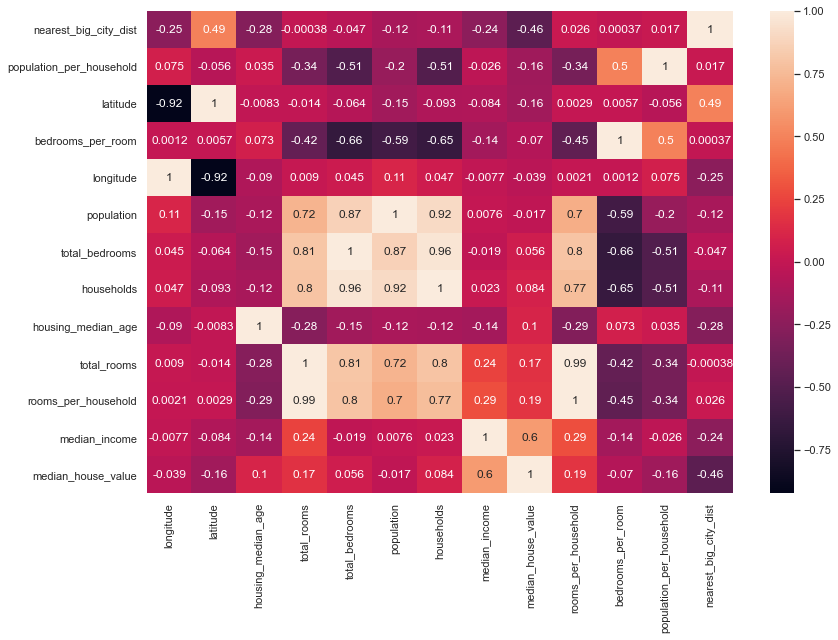

In [48]:
sns.set(font_scale= 1)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df.corr().sort_values(by='median_house_value'), annot=True)

### Removing highly correalted features

In [49]:
df = df.drop(['population', 'total_bedrooms', 'total_rooms', 'households'], 1)

In [50]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household', 'nearest_big_city',
       'nearest_big_city_dist'],
      dtype='object')

### OneHotEncoding Cities

In [51]:
df.shape

(14338, 11)

In [52]:
df_cat = ['ocean_proximity', 'nearest_big_city']

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household', 'nearest_big_city',
       'nearest_big_city_dist'],
      dtype='object')

In [54]:
X = df.drop('median_house_value', 1)

ohe = OneHotEncoder()

enc_df = pd.DataFrame(ohe.fit_transform(
    X[df_cat]).toarray())

In [55]:
enc_df


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14334,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14335,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14336,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [56]:
def c_variance_ohe(X):
    total=0
    clist=[]
    for i in np.arange(0,enc_df.shape[1]):
        p=PCA(n_components=i+1)
        p.fit(X)
        total=total+p.explained_variance_ratio_[i]
        clist.append(total)

    return clist

x_train_variance=list(map(lambda x:x*100,c_variance_ohe(enc_df)))

Text(0.5, 1.0, 'comulative variance ratio of p.c.a components')

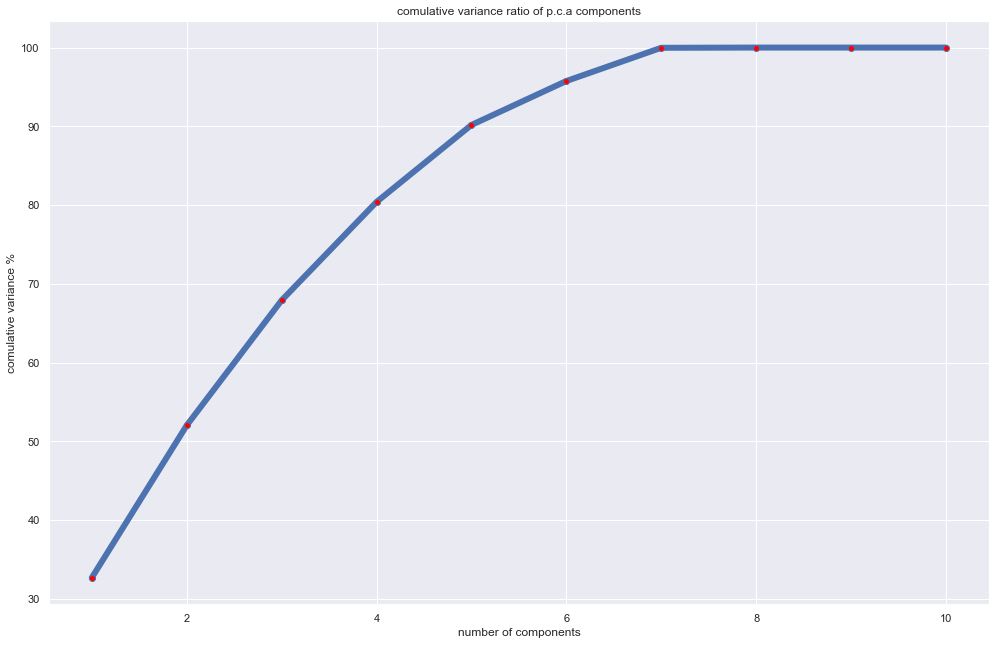

In [57]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(1,enc_df.shape[1]+1),x_train_variance,marker='o',markerfacecolor='red',lw=6)
plt.xlabel('number of components')
plt.ylabel('comulative variance %')
plt.title('comulative variance ratio of p.c.a components')

In [58]:
# TEST
pca = PCA(n_components=7)
enc_df = pca.fit_transform(enc_df)

In [59]:
enc_df = pd.DataFrame(enc_df)

In [60]:
enc_df

,0,1,2,3,4,5,6
0,0.659160,0.917118,-0.513057,-0.233158,-0.328984,-0.221497,-0.301596
1,0.748065,-0.730087,0.565942,-0.197756,-0.272523,-0.055121,-0.014449
2,-0.673940,0.424168,0.575317,-0.359392,0.510716,-0.124901,-0.046800
3,0.222805,0.379970,0.369887,1.299858,0.026370,0.268393,-0.143267
4,-0.150791,0.670752,-0.213911,-0.433687,-0.108108,0.513500,0.449784
...,...,...,...,...,...,...,...
14333,-0.903732,-0.213725,-0.401456,0.010555,-0.138971,0.018822,0.034337
14334,0.210884,-0.877209,-0.524940,0.148201,0.312377,-0.190294,-0.154812
14335,-0.903732,-0.213725,-0.401456,0.010555,-0.138971,0.018822,0.034337
14336,0.573209,0.748598,-0.177246,0.572595,-0.019493,-0.088710,0.741854


In [61]:
enc_df.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)


In [62]:
df = pd.concat([df, enc_df], axis=1)



In [63]:
df = df.drop(df_cat, axis=1)


In [64]:
df

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,nearest_big_city_dist,0,1,2,3,4,5,6
0,-122.22,37.78,44.0,0.732416,131900.0,270.446350,0.003720,1.198858,17.577085,0.659160,0.917118,-0.513057,-0.233158,-0.328984,-0.221497,-0.301596
1,-119.68,36.77,21.0,1.793957,150800.0,236.708179,0.004130,1.196351,206.894843,0.748065,-0.730087,0.565942,-0.197756,-0.272523,-0.055121,-0.014449
2,-117.96,33.80,30.0,1.561654,195200.0,147.736113,0.006688,1.254504,22.103384,-0.673940,0.424168,0.575317,-0.359392,0.510716,-0.124901,-0.046800
3,-117.28,32.83,34.0,1.316569,500000.0,372.115872,0.002710,1.063829,17.145839,0.222805,0.379970,0.369887,1.299858,0.026370,0.268393,-0.143267
4,-122.53,38.32,22.0,1.756995,332300.0,575.394346,0.001700,1.161936,61.274898,-0.150791,0.670752,-0.213911,-0.433687,-0.108108,0.513500,0.449784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14333,-118.75,34.26,26.0,1.700868,198100.0,320.023998,0.003158,1.258177,52.068113,-0.903732,-0.213725,-0.401456,0.010555,-0.138971,0.018822,0.034337
14334,-116.76,34.23,10.0,0.958238,89000.0,737.656504,0.001577,1.168303,138.255034,0.210884,-0.877209,-0.524940,0.148201,0.312377,-0.190294,-0.154812
14335,-118.47,34.03,29.0,1.318577,290600.0,489.650148,0.002063,1.091686,21.042899,-0.903732,-0.213725,-0.401456,0.010555,-0.138971,0.018822,0.034337
14336,-122.41,37.66,32.0,1.498506,246700.0,236.087538,0.004242,1.193124,12.783314,0.573209,0.748598,-0.177246,0.572595,-0.019493,-0.088710,0.741854


In [65]:
from sklearn.preprocessing import StandardScaler

### PCA on whole df

In [66]:
X = df.drop('median_house_value', 1)
X = StandardScaler().fit_transform(X)
y = df.loc[: , 'median_house_value']

print(X.shape)
print(y.shape)


(14338, 15)
(14338,)


In [67]:
def c_variance(X):
    total=0
    clist=[]
    for i in np.arange(0,X.shape[1]):
        p=PCA(n_components=i+1)
        p.fit(X)
        total=total+p.explained_variance_ratio_[i]
        clist.append(total)

    return clist

x_train_variance=list(map(lambda x:x*100,c_variance(X)))


Text(0.5, 1.0, 'comulative variance ratio of p.c.a components')

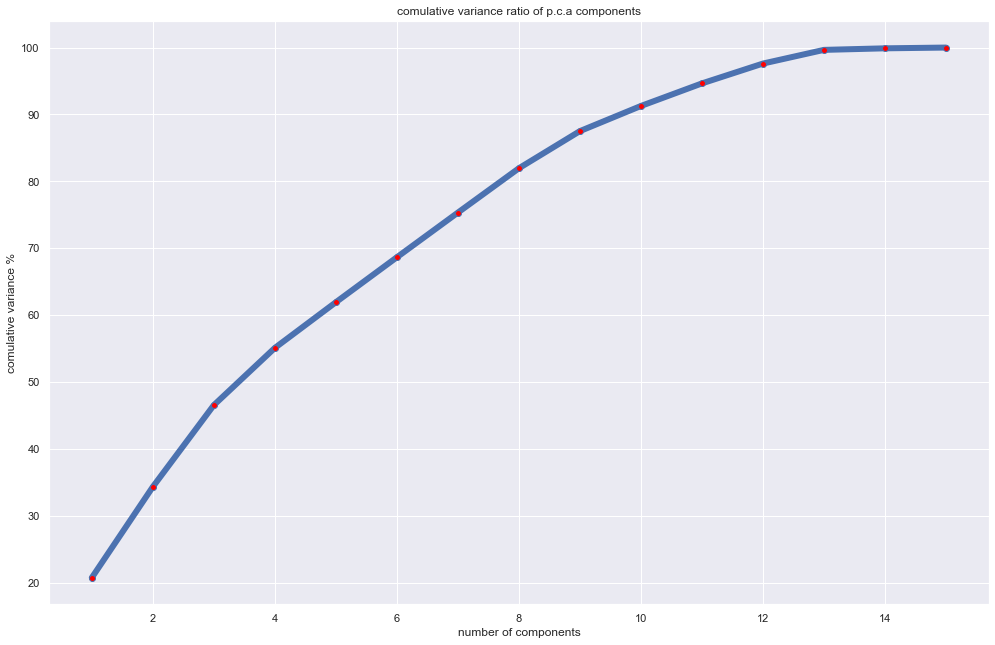

In [68]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(1,X.shape[1]+1),x_train_variance,marker='o',markerfacecolor='red',lw=6)
plt.xlabel('number of components')
plt.ylabel('comulative variance %')
plt.title('comulative variance ratio of p.c.a components')


In [69]:

# pca_2 = PCA(n_components=10)
# X = pca_2.fit_transform(X)
# X = pd.DataFrame(X)

In [70]:
X


array([[-1.31792297,  0.97906236,  1.19036599, ..., -0.87547797,
        -0.78023781, -1.22160491],
       [-0.04709109,  0.51071059, -0.69726506, ..., -0.72522572,
        -0.19416602, -0.05852594],
       [ 0.81347224, -0.86652181,  0.04137317, ...,  1.35909703,
        -0.4399737 , -0.18956213],
       ...,
       [ 0.55830521, -0.75986745, -0.04069774, ..., -0.36982414,
         0.06630054,  0.13907907],
       [-1.4129852 ,  0.9234166 ,  0.205515  , ..., -0.05187268,
        -0.31248781,  3.0048537 ],
       [ 1.31379975, -1.33023643, -0.3689814 , ..., -0.16564704,
         3.06675882, -1.76331718]])

In [71]:
y


0        131900.0
1        150800.0
2        195200.0
3        500000.0
4        332300.0
           ...   
14333    198100.0
14334     89000.0
14335    290600.0
14336    246700.0
14337    134400.0
Name: median_house_value, Length: 14338, dtype: float64

In [72]:
from sklearn.linear_model import LinearRegression, Ridge, Lars
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection

In [73]:
models = []

models.append(('LR', LinearRegression()))
# models.append(('RR', Ridge()))
# models.append(('L', Lasso()))
# models.append(('EN', ElasticNet()))
# models.append(('Lars', Lars()))
# models.append(('DTR', DecisionTreeRegressor()))

models.append(('GBR', GradientBoostingRegressor()))
models.append(('KNNR', KNeighborsRegressor()))
models.append(('XGBR', XGBRegressor()))
models.append(('RF', RandomForestRegressor()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.561586 (0.013875)
GBR: 0.754302 (0.007276)
KNNR: 0.696651 (0.005898)
XGBR: 0.795340 (0.007726)
RF: 0.790085 (0.006909)


In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
# param_grid = {
#     'eta' : [0.1, 0.15, 0.2, 0.25, 0.3],
#     'max_depth':range(3,10,2),
#     'min_child_weight':range(1,6,2),
#     'gamma':[i/10.0 for i in range(0,5)],
#     'subsample':[i/10.0 for i in range(6,10)],
#     'colsample_bytree':[i/10.0 for i in range(6,10)],
# }
# model = XGBRegressor()
# kfold = model_selection.KFold(n_splits=6)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
# grid_result = grid.fit(X, y)
#
# means = grid_result.cv_results_['mean_test_score']
# params = grid_result.cv_results_['params']
# for mean, param in zip(means, params):
#     print("%f with: %r" % (mean, param))
#
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

